In [1]:
# Install statements
# install.packages(c("remotes","pROC","naivebayes"))
# remotes::install_github("jtextor/bayesianNetworks")
# install.packages("bnlearn")
# install.packages("dagitty")
# install.packages("lavaan")

In [2]:
# Packages

library( bayesianNetworks )
library( naivebayes )
library( bnlearn )
library( dagitty )
library( lavaan )

Warning message:
"package 'naivebayes' was built under R version 3.6.3"naivebayes 0.9.7 loaded
Warning message:
"package 'bnlearn' was built under R version 3.6.3"Warning message:
"package 'dagitty' was built under R version 3.6.3"
Attaching package: 'dagitty'

The following objects are masked from 'package:bnlearn':

    ancestors, children, descendants, parents, spouses

Warning message:
"package 'lavaan' was built under R version 3.6.3"This is lavaan 0.6-7
lavaan is BETA software! Please report any bugs.


In [3]:
# Read in the .csv that was created during the preprocessing

df <- read.csv('Dataset_Numerical_Classes.csv')

# Visually inspect the dataframe

head(df)

Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation_seeking,Caffeine,Cannabis,Meth
35-44,0,Professional certificate/ diploma,39,36,42,37,42,0.1883,0.0700,6,0,0
25-34,1,Doctorate degree,29,52,55,48,41,0.1629,0.1183,6,4,3
35-44,1,Professional certificate/ diploma,31,45,40,32,34,0.1464,0.1321,6,3,0
18-24,0,Masters degree,34,34,46,47,46,0.1464,0.0700,5,2,0
35-44,0,Doctorate degree,43,28,43,41,50,0.1883,0.1183,6,3,0
65+,0,Left school at 18,29,38,35,55,52,0.1464,0.0462,6,0,0


In [4]:
# Transforming the non numerical ordinal values to numerical values with ordering

# BNLearn wants all data to be a double so we will transform all data to doubles 

df$Caffeine <- as.double( ordered(df$Caffeine, levels =c("0","1","2","3","4","5","6")))
df$Cannabis <- as.double( ordered(df$Cannabis, levels =c("0","1","2","3","4","5","6")))
df$Meth <- as.double( ordered(df$Meth, levels =c("0","1","2","3","4","5","6")))
df$Age <- as.double( ordered(df$Age, levels =c("18-24","25-34","35-44","45-54","55-64","65+")))
df$Education <- as.double( ordered(df$Education, levels=c("Left school before 16","Left school at 16","Left school at 17","Left school at 18","College or university dropout","Professional certificate/ diploma","University degree","Masters degree","Doctorate degree")))

In [5]:
# BNLearn wants all data to be a double so we will transform all data to doubles 

df$Gender <- as.double(df$Gender) 
df$Nscore <- as.double(df$Nscore) 
df$Escore <- as.double(df$Escore) 
df$Oscore <- as.double(df$Oscore) 
df$Ascore <- as.double(df$Ascore) 
df$Cscore <- as.double(df$Cscore) 

# Confirm that all variables are succesfully transformed into doubles
str(df)

'data.frame':	1885 obs. of  13 variables:
 $ Age              : num  3 2 3 1 3 6 4 3 3 5 ...
 $ Gender           : num  0 1 1 0 0 0 1 1 0 1 ...
 $ Education        : num  6 9 6 8 9 4 8 2 6 8 ...
 $ Nscore           : num  39 29 31 34 43 29 31 24 42 33 ...
 $ Escore           : num  36 52 45 34 28 38 32 52 55 40 ...
 $ Oscore           : num  42 55 40 46 43 35 43 40 39 36 ...
 $ Ascore           : num  37 48 32 47 41 55 41 41 48 47 ...
 $ Cscore           : num  42 41 34 46 50 52 48 52 49 43 ...
 $ Impulsive        : num  0.188 0.163 0.146 0.146 0.188 ...
 $ Sensation_seeking: num  0.07 0.118 0.132 0.07 0.118 ...
 $ Caffeine         : num  7 7 7 6 7 7 7 7 7 7 ...
 $ Cannabis         : num  1 5 4 3 4 1 2 1 1 2 ...
 $ Meth             : num  1 4 1 1 1 1 1 1 1 1 ...


In [6]:
# Inspecting the unique values of all the variables (note that R does no allow counting from 0 so all the levels of the labels are shifted +1)

print("age")
unique(df$Age)
print("gender")
unique(df$Gender)
print("education")
unique(df$Education)
print("Nscore")
unique(df$Nscore)
print("Escore")
unique(df$Escore)
print("Cscore")
unique(df$Cscore)
print("Impulsive")
unique(df$Impulsive)
print("Sensation_seeking")
unique(df$Sensation_seeking)
print("Caffeine")
unique(df$Caffeine)
print("Cannabis")
unique(df$Cannabis)
print("Meth")
unique(df$Meth)

[1] "age"


[1] 3 2 1 6 4 5

[1] "gender"


[1] 0 1

[1] "education"


[1] 6 9 8 4 2 7 5 1 3

[1] "Nscore"


[1] 39 29 31 34 43 24 42 33 26 56 28 27 19 22 41 49 32 25 40 51 35 36 46 44 37
[26] 47 23 30 38 18 45 17 53 50 60 21 54 59 48 20 55 16 57 52 58 14 15 13 12

[1] "Escore"


[1] 36 52 45 34 28 38 32 55 40 41 49 29 31 39 27 43 33 16 44 37 51 42 48 46 47
[26] 35 50 30 26 58 53 54 23 22 24 19 20 21 25 56 59 18

[1] "Cscore"


[1] 42 41 34 46 50 52 48 49 43 53 38 36 59 47 31 30 33 35 51 25 37 45 39 44 27
[26] 40 29 54 55 32 56 20 28 26 22 24 23 19 17 21 57

[1] "Impulsive"


[1] 0.1883 0.1629 0.1464 0.1363 0.1146 0.0785 0.0552 0.0106 0.1034 0.0037

[1] "Sensation_seeking"


[1] 0.0700 0.1183 0.1321 0.0462 0.1162 0.1119 0.0897 0.1114 0.0377 0.0546

[1] "Caffeine"


[1] 7 6 5 4 1 2 3

[1] "Cannabis"


[1] 1 5 4 3 2 7 6

[1] "Meth"


[1] 1 4 2 7 5 3 6

In [7]:
# Split our data into a training and testing set to be able to test how well it generalizes on unseen data

# 75% of the sample size
smp_size <- floor(0.75 * nrow(df))

# set the seed to make our partition reproducible
set.seed(1111)
train_ind <- sample(seq_len(nrow(df)), size = smp_size)

train <- df[train_ind, ]
test <- df[-train_ind, ]

# Inspect the train and test set

str(train)
str(test)

'data.frame':	1413 obs. of  13 variables:
 $ Age              : num  3 1 2 1 1 2 4 1 1 2 ...
 $ Gender           : num  0 0 0 1 0 1 1 1 1 1 ...
 $ Education        : num  6 5 8 5 5 8 8 1 5 7 ...
 $ Nscore           : num  35 49 44 40 40 36 20 56 46 25 ...
 $ Escore           : num  34 38 36 33 31 48 50 35 29 45 ...
 $ Oscore           : num  46 48 32 44 43 60 46 48 49 55 ...
 $ Ascore           : num  47 42 37 46 49 39 53 39 43 56 ...
 $ Cscore           : num  44 28 44 41 41 42 50 41 35 49 ...
 $ Impulsive        : num  0.146 0.136 0.115 0.188 0.103 ...
 $ Sensation_seeking: num  0.0377 0.1183 0.1114 0.1119 0.1114 ...
 $ Caffeine         : num  7 6 7 6 7 7 7 5 6 7 ...
 $ Cannabis         : num  7 5 1 7 3 3 1 7 7 6 ...
 $ Meth             : num  1 1 1 4 1 1 1 4 5 1 ...
'data.frame':	472 obs. of  13 variables:
 $ Age              : num  3 3 2 5 5 4 5 3 4 3 ...
 $ Gender           : num  1 1 0 0 0 1 0 0 1 1 ...
 $ Education        : num  6 2 7 7 6 2 4 8 2 7 ...
 $ Nscore           : num 

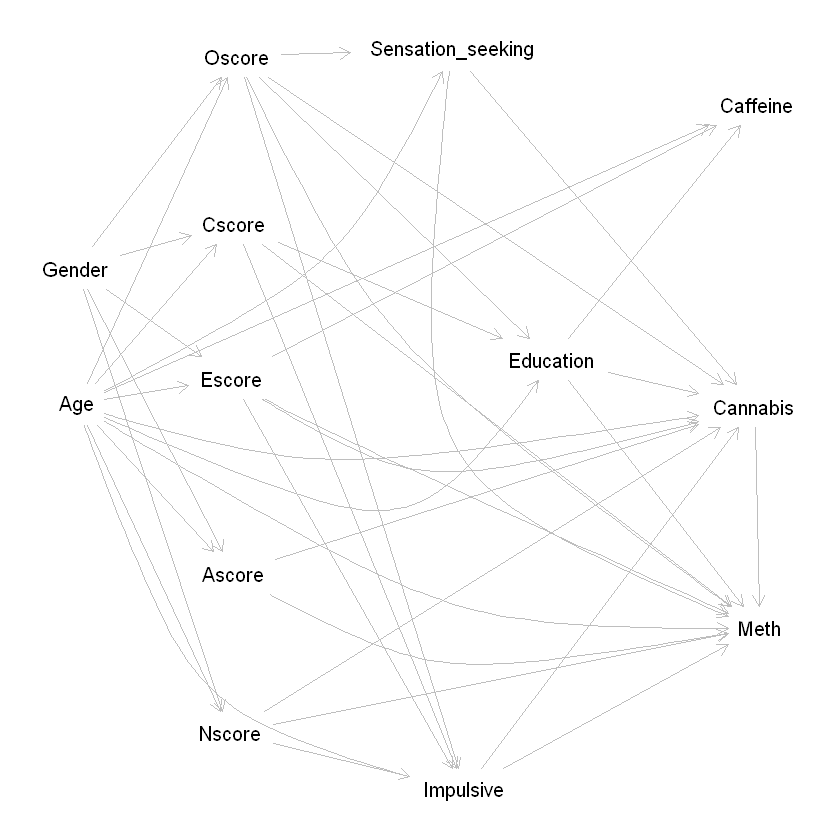

In [8]:
# Creating and plotting the DAG

graph <- dagitty('dag {
bb="0,0,1,1"
Age [pos="0.140,0.493"]
Ascore [pos="0.268,0.602"]
Caffeine [pos="0.696,0.299"]
Cannabis [pos="0.694,0.494"]
Cscore [pos="0.269,0.376"]
Education [pos="0.528,0.464"]
Escore [pos="0.266,0.476"]
Gender [pos="0.139,0.405"]
Impulsive [pos="0.457,0.742"]
Meth [pos="0.698,0.637"]
Nscore [pos="0.265,0.705"]
Oscore [pos="0.271,0.268"]
Sensation_seeking [pos="0.447,0.264"]
Age -> Ascore
Age -> Caffeine
Age -> Cannabis [pos="0.332,0.543"]
Age -> Cscore
Age -> Education [pos="0.421,0.597"]
Age -> Escore
Age -> Impulsive [pos="0.228,0.699"]
Age -> Meth [pos="0.450,0.644"]
Age -> Nscore
Age -> Oscore
Age -> Sensation_seeking [pos="0.366,0.404"]
Ascore -> Cannabis
Ascore -> Meth [pos="0.429,0.676"]
Cannabis -> Meth
Cscore -> Education
Education -> Caffeine
Education -> Cannabis
Education -> Meth
Escore -> Caffeine
Escore -> Cannabis [pos="0.416,0.556"]
Escore -> Impulsive
Escore -> Meth [pos="0.317,0.501"]
Gender -> Ascore
Gender -> Cscore
Gender -> Escore
Gender -> Nscore
Gender -> Oscore
Impulsive -> Cannabis
Impulsive -> Meth
Nscore -> Cannabis
Nscore -> Impulsive
Nscore -> Meth
Oscore -> Cannabis
Oscore -> Education
Oscore -> Impulsive
Oscore -> Meth [pos="0.376,0.454"]
Oscore -> Sensation_seeking
Sensation_seeking -> Cannabis
Sensation_seeking -> Meth [pos="0.393,0.550"]
Cscore -> Impulsive
Cscore -> Meth
}
')

plot(graph)

In [9]:
# Fitting the network on our training dataset

network <- model2network(toString(graph,"bnlearn"))
fit <- bn.fit(network, as.data.frame(scale(train)))

# Inspecting our fit

fit


  Bayesian network parameters

  Parameters of node Age (Gaussian distribution)

Conditional density: Age
Coefficients:
  (Intercept)  
-9.397217e-17  
Standard deviation of the residuals: 1 

  Parameters of node Ascore (Gaussian distribution)

Conditional density: Ascore | Age + Gender
Coefficients:
  (Intercept)            Age         Gender  
 2.850629e-16   4.143554e-02  -2.074681e-01  
Standard deviation of the residuals: 0.9774637 

  Parameters of node Caffeine (Gaussian distribution)

Conditional density: Caffeine | Age + Education + Escore
Coefficients:
  (Intercept)            Age      Education         Escore  
-4.931712e-17   3.468024e-02   4.559263e-02   6.860927e-02  
Standard deviation of the residuals: 0.9966852 

  Parameters of node Cannabis (Gaussian distribution)

Conditional density: Cannabis | Age + Ascore + Education + Escore + Impulsive + Nscore + Oscore + Sensation_seeking
Coefficients:
      (Intercept)                Age             Ascore          Educatio

In [10]:
# Predicting on the testing dataset with our fitted model (Cannabis)

pred <- predict(fit,node="Cannabis", data=test,method="bayes-lw")

accuracy <- mean(test$Cannabis - pred)
print("Average accuracy with entire network:")
accuracy

pred_parents <- predict(fit,node="Cannabis", data=test)

accuracy_par <- mean(test$Cannabis - pred_parents)
print("Average accuracy with only parents:")
accuracy_par

[1] "Average accuracy with entire network:"


[1] 0.2226182

[1] "Average accuracy with only parents:"


[1] 0.3580996

In [11]:
# Predicting on the testing dataset with our fitted model (Meth)

pred <- predict(fit,node="Meth", data=test,method="bayes-lw")

accuracy <- mean(test$Meth - pred)
print("Average accuracy with entire network:")
accuracy

pred_parents <- predict(fit,node="Meth", data=test)

accuracy_par <- mean(test$Meth - pred_parents)
print("Average accuracy with only parents:")
accuracy_par

[1] "Average accuracy with entire network:"


[1] 0.9216096

[1] "Average accuracy with only parents:"


[1] 0.9227054

In [12]:
# Predicting on the testing dataset with our fitted model (Caffeine)

pred <- predict(fit,node="Caffeine", data=test,method="bayes-lw")

accuracy <- mean(test$Caffeine - pred)
print("Average accuracy with entire network:")
accuracy

pred_parents <- predict(fit,node="Caffeine", data=test)

accuracy_par <- mean(test$Caffeine - pred_parents)
print("Average accuracy with only parents:")
accuracy_par

[1] "Average accuracy with entire network:"


[1] 3.445682

[1] "Average accuracy with only parents:"


[1] 3.445673

In [13]:
balancedSplit(df, 0.75)

ERROR: Error in balancedSplit(df, 0.75): could not find function "balancedSplit"


In [16]:
#install.packages("alookr")

also installing the dependencies 'ellipsis', 'rlang', 'Rcpp', 'RcppArmadillo', 'zip', 'bit', 'vctrs', 'SparseM', 'MatrixModels', 'conquer', 'sp', 'openxlsx', 'minqa', 'nloptr', 'statmod', 'png', 'jpeg', 'bit64', 'blob', 'DBI', 'memoise', 'carData', 'pbkrtest', 'quantreg', 'maptools', 'rio', 'lme4', 'survival', 'latticeExtra', 'htmlTable', 'viridis', 'xfun', 'proto', 'RSQLite', 'chron', 'inum', 'fastmatch', 'TH.data', 'car', 'abind', 'Hmisc', 'e1071', 'readstata13', 'nortest', 'webshot', 'rmarkdown', 'sqldf', 'partykit', 'Formula', 'gsubfn', 'crosstalk', 'ParamHelpers', 'BBmisc', 'checkmate', 'data.table', 'parallelMap', 'XML', 'libcoin', 'matrixStats', 'multcomp', 'gtools', 'mice', 'RcmdrMisc', 'corrplot', 'classInt', 'moments', 'kableExtra', 'prettydoc', 'smbinning', 'gridExtra', 'DMwR', 'bitops', 'plotly', 'productplots', 'mlr', 'doParallel', 'FNN', 'RANN', 'mvtnorm', 'modeltools', 'strucchange', 'coin', 'sandwich', 'RcppEigen', 'gplots', 'globals', 'listenv', 'parallelly', 'dlookr',

package 'ellipsis' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked
package 'Rcpp' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'Rcpp'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Lieuwe\Anaconda3\envs\R-Environment\Lib\R\library\00LOCK\Rcpp\libs\x64\Rcpp.dll to C:\Users\Lieuwe\Anaconda3\envs\R-Environment\Lib\R\library\Rcpp\libs\x64\Rcpp.dll: Permission denied"Warning message:
"restored 'Rcpp'"

package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'zip' successfully unpacked and MD5 sums checked
package 'bit' successfully unpacked and MD5 sums checked
package 'vctrs' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'MatrixModels' successfully unpacked and MD5 sums checked
package 'conquer' successfully unpacked and MD5 sums checked
package 'sp' successfully unpacked and MD5 sums checked
package 'openxlsx' successfully unpacked and MD5 sums checked
package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'statmod' successfully unpacked and MD5 sums checked
package 'png' successfully unpacked and MD5 sums checked
package 'jpeg' successfully unpacked and MD5 sums checked
package 'bit64' successfully unpacked and MD5 sums checked
package 'blob' successfully unpacked and MD5 sums checked
package 'DBI' successfully unpacked and MD

In [ ]:
library(alookr)
library(dplyr)

In [29]:
sb <- df %>%
  split_by(Meth, seed = 6534)

In [35]:
sb

Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation_seeking,Caffeine,Cannabis,Meth,split_flag
3,0,6,39,36,42,37,42,0.1883,0.0700,7,1,1,train
2,1,9,29,52,55,48,41,0.1629,0.1183,7,5,4,train
3,1,6,31,45,40,32,34,0.1464,0.1321,7,4,1,train
1,0,8,34,34,46,47,46,0.1464,0.0700,6,3,1,train
3,0,9,43,28,43,41,50,0.1883,0.1183,7,4,1,train
6,0,4,29,38,35,55,52,0.1464,0.0462,7,1,1,train
4,1,8,31,32,43,41,48,0.1883,0.1162,7,2,1,test
3,1,2,24,52,40,41,52,0.1363,0.1119,7,1,1,train
3,0,6,42,55,39,48,49,0.1464,0.0462,7,1,1,train
5,1,8,33,40,36,47,43,0.1464,0.0897,7,2,1,train


In [30]:
train <- sb %>%
  extract_set(set = "train")

test <- sb %>%
  extract_set(set = "test")

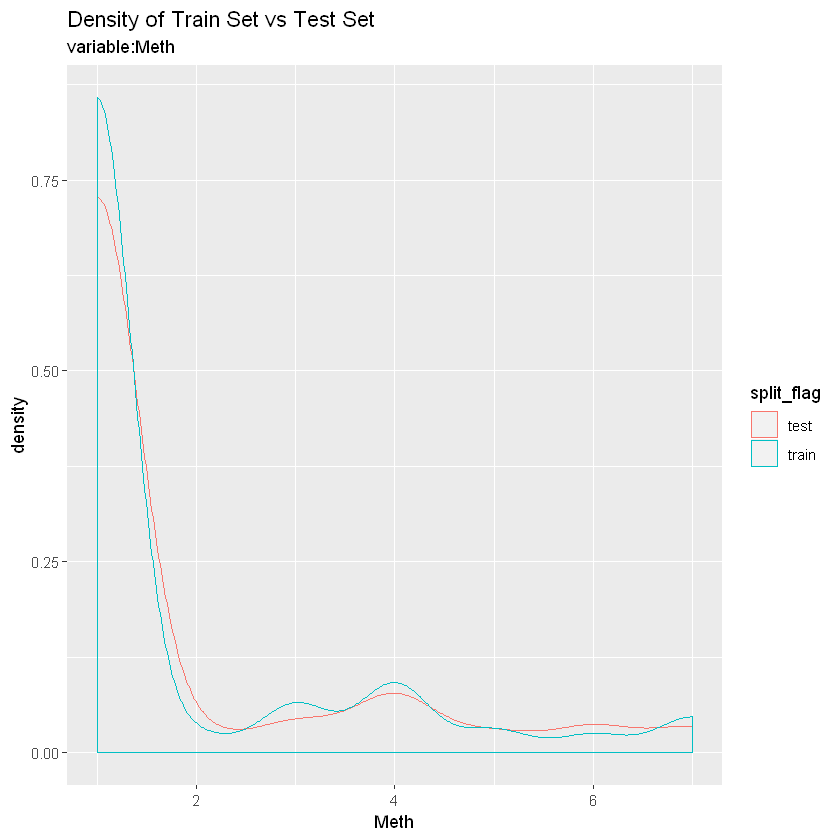

In [31]:
sb %>%
  compare_plot("Meth")

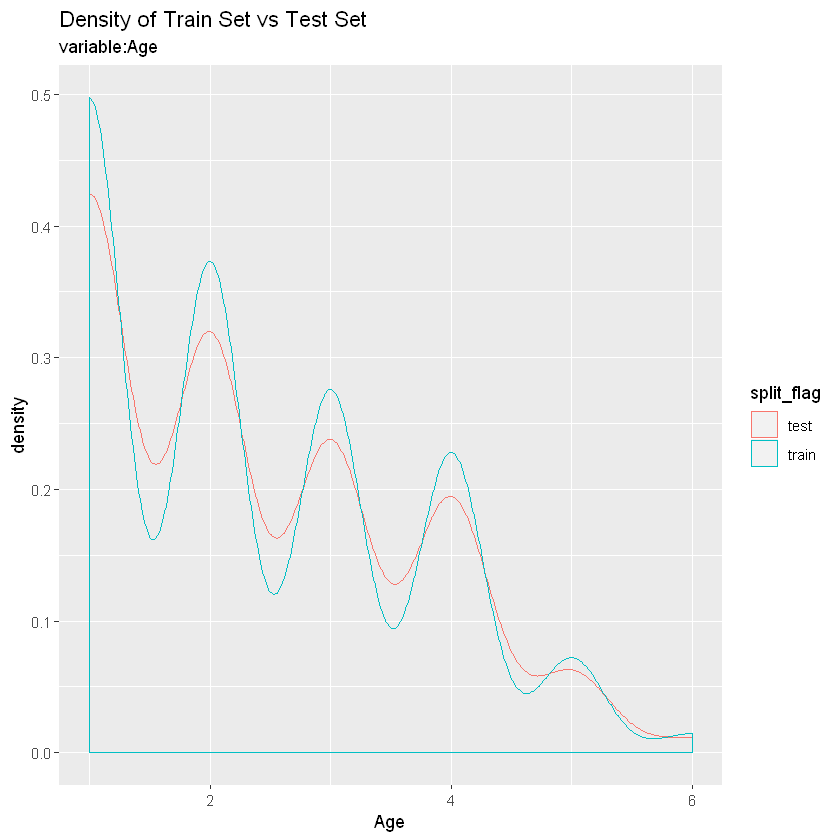

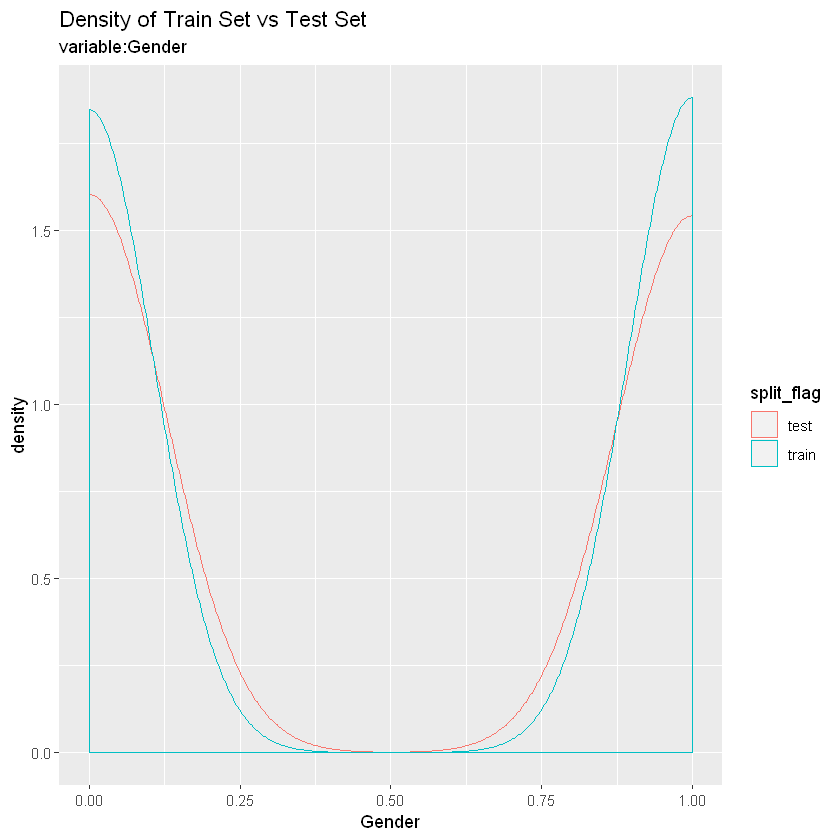

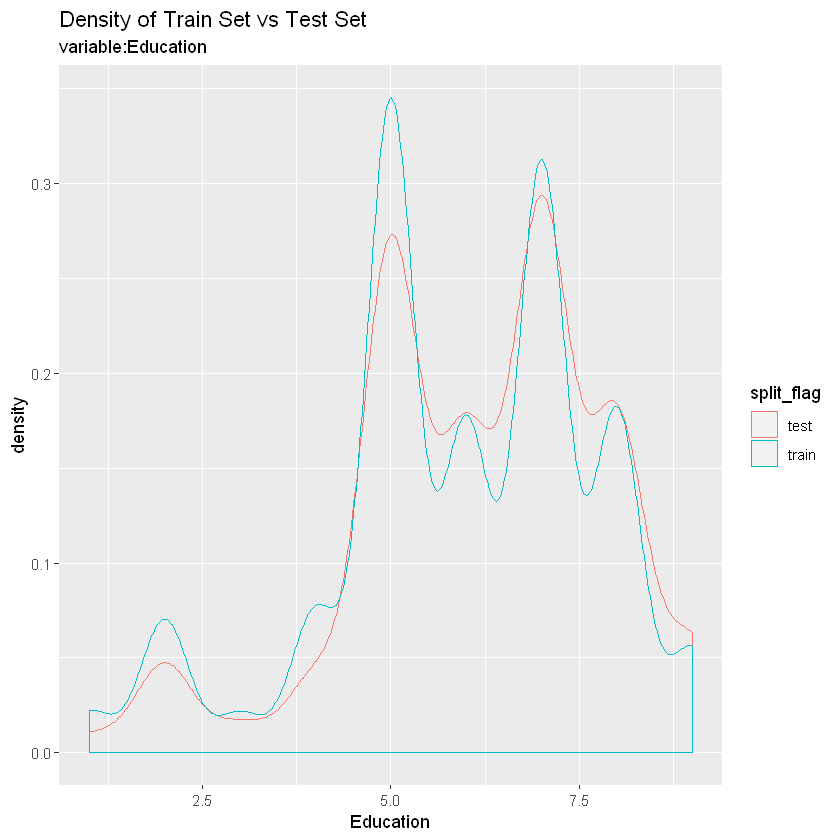

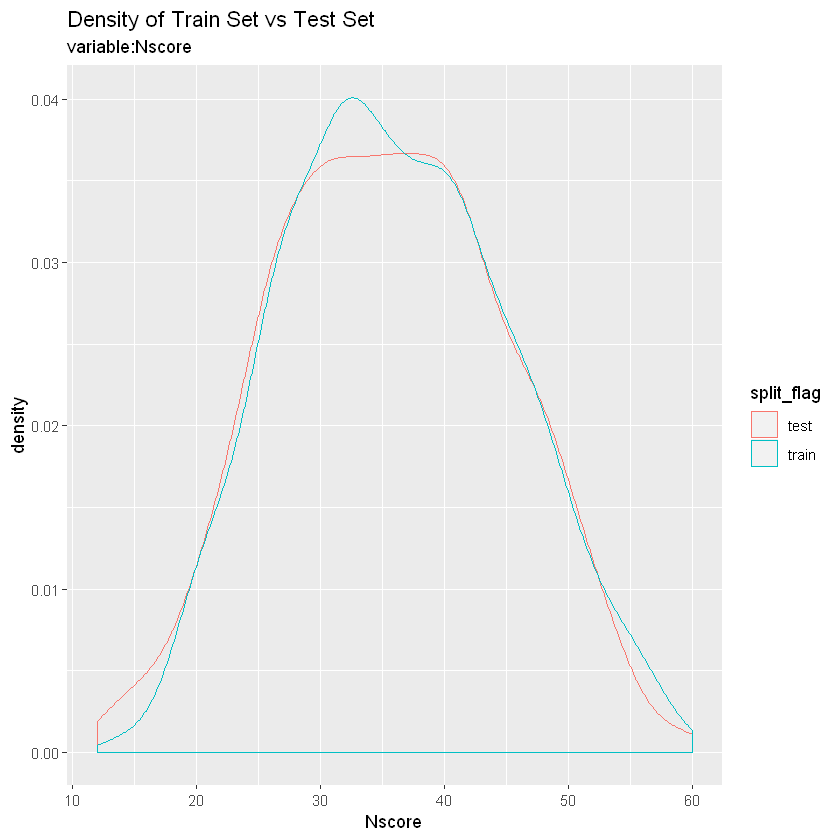

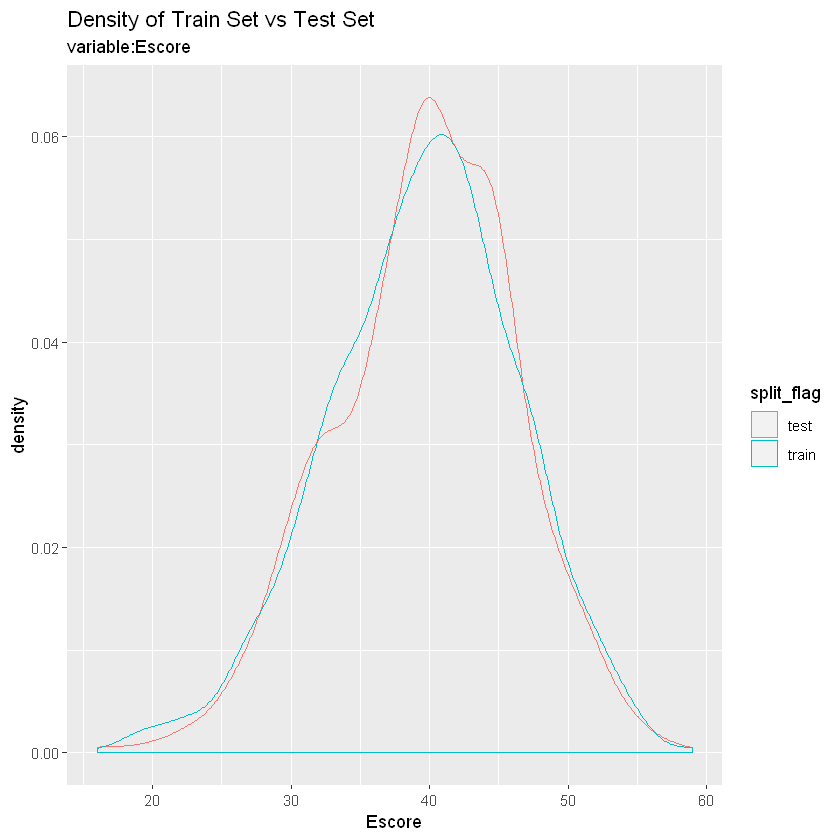

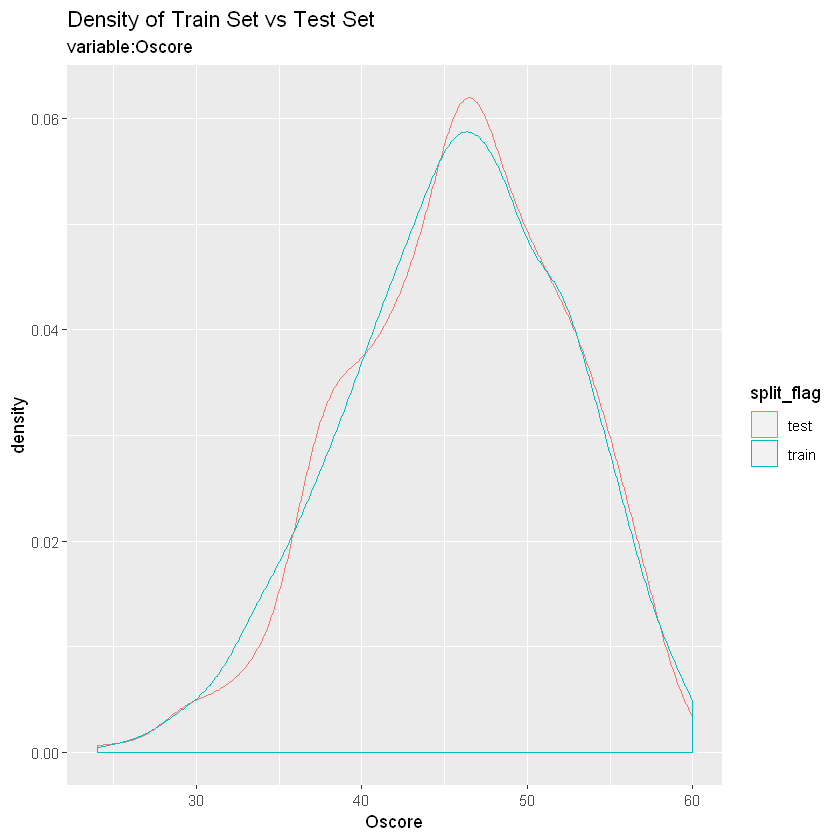

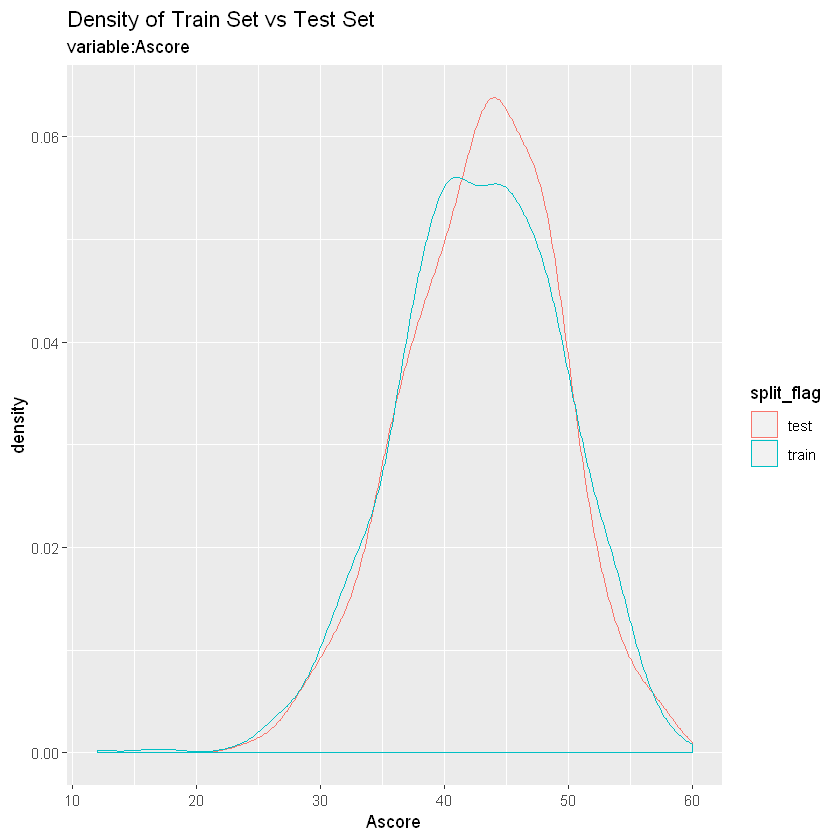

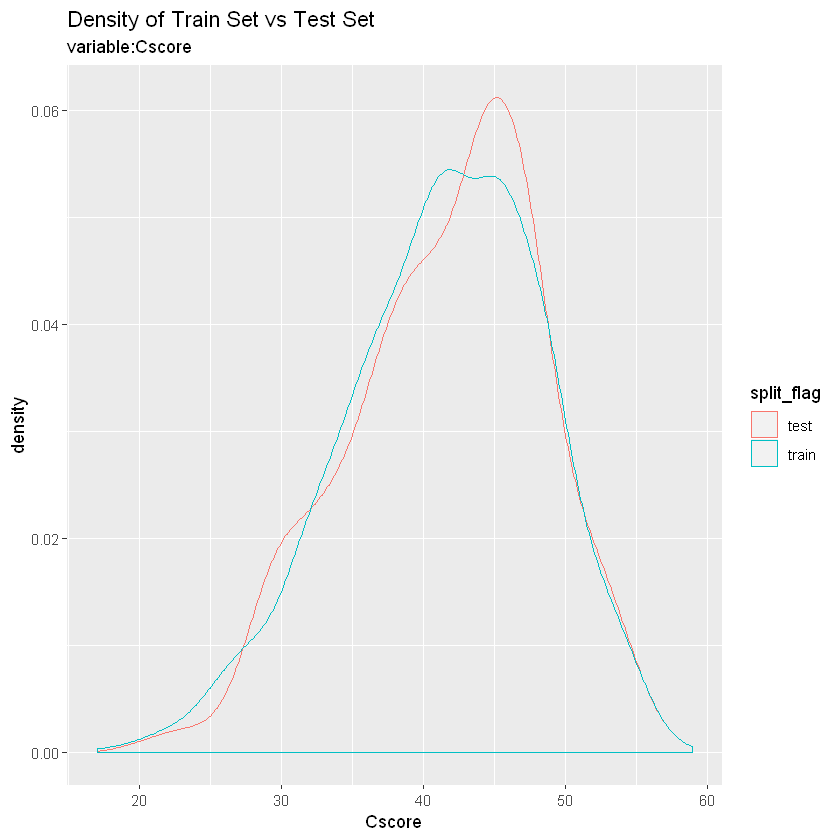

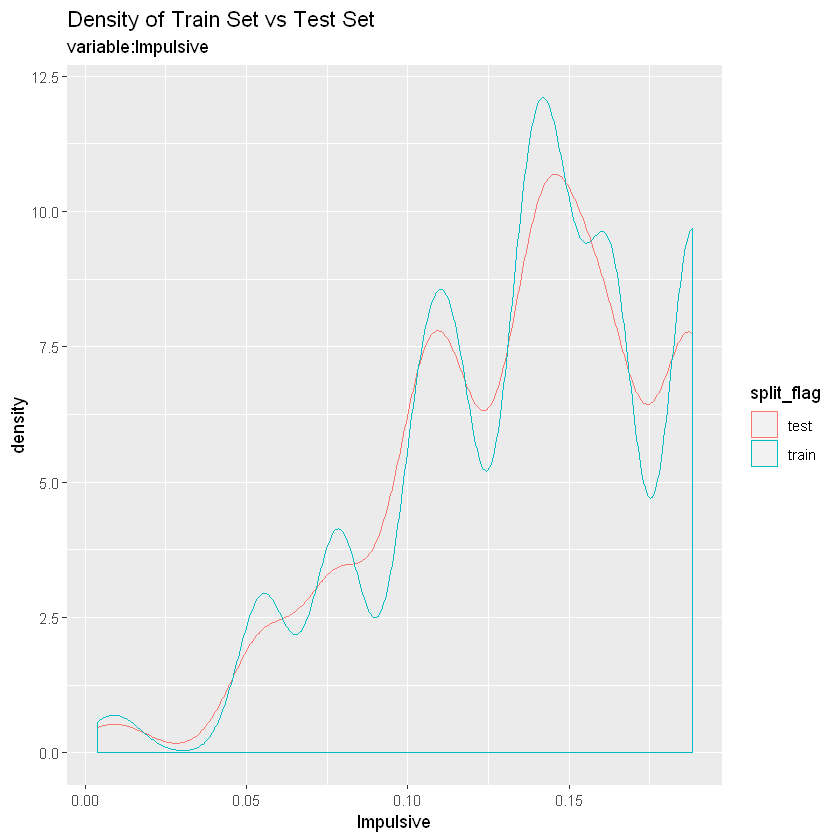

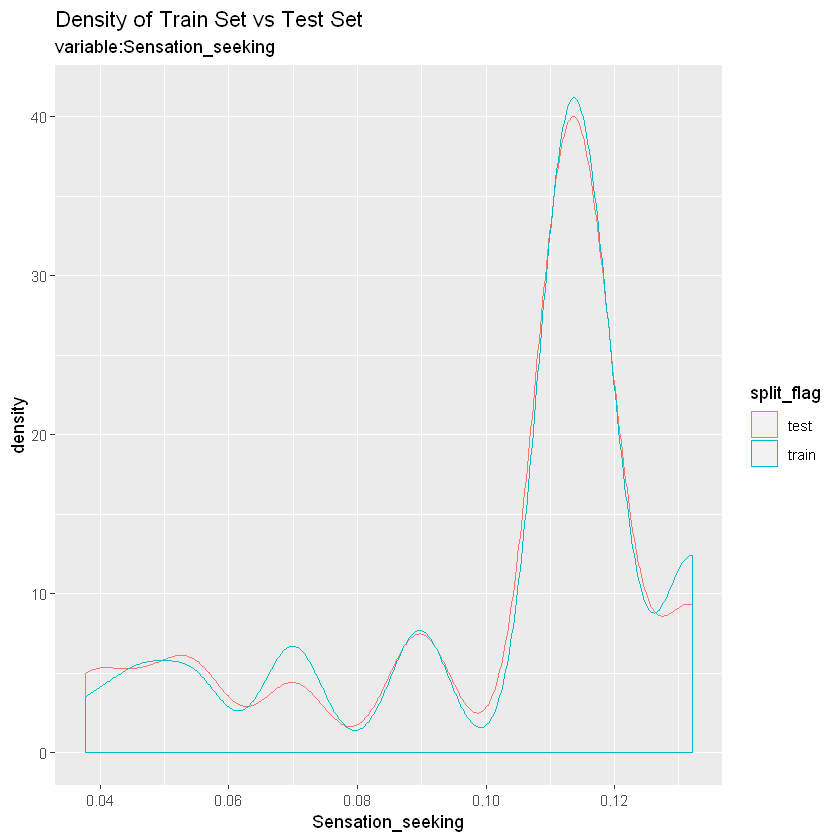

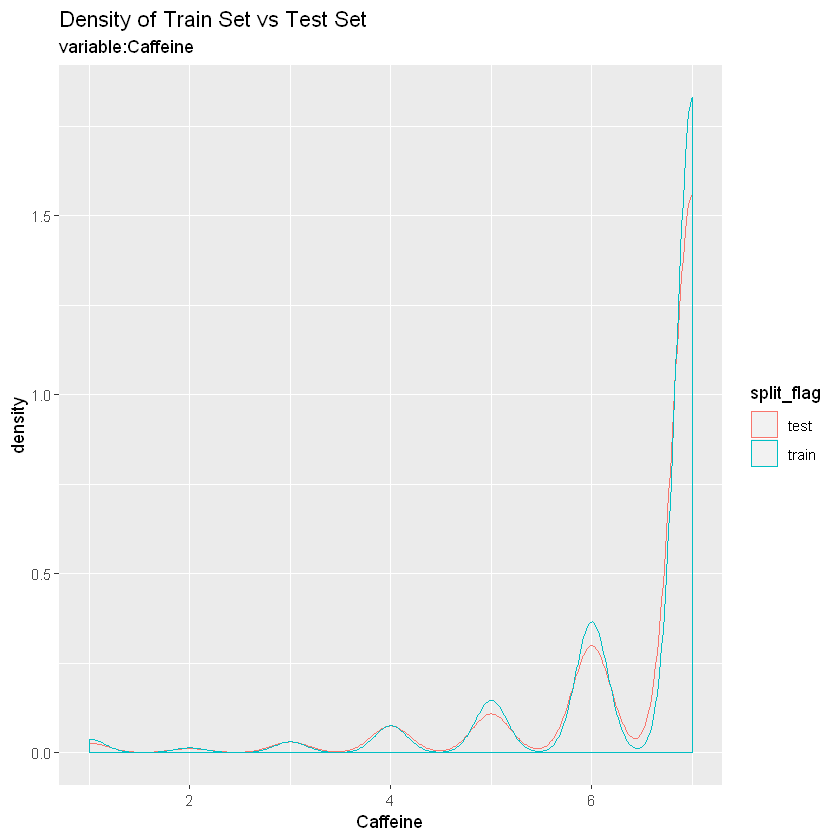

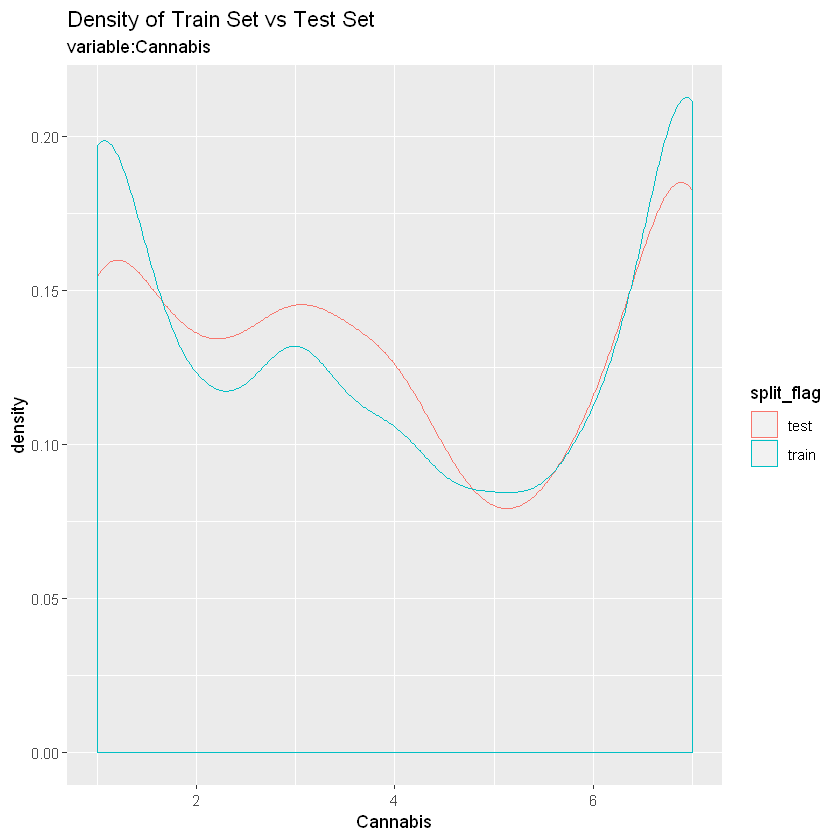

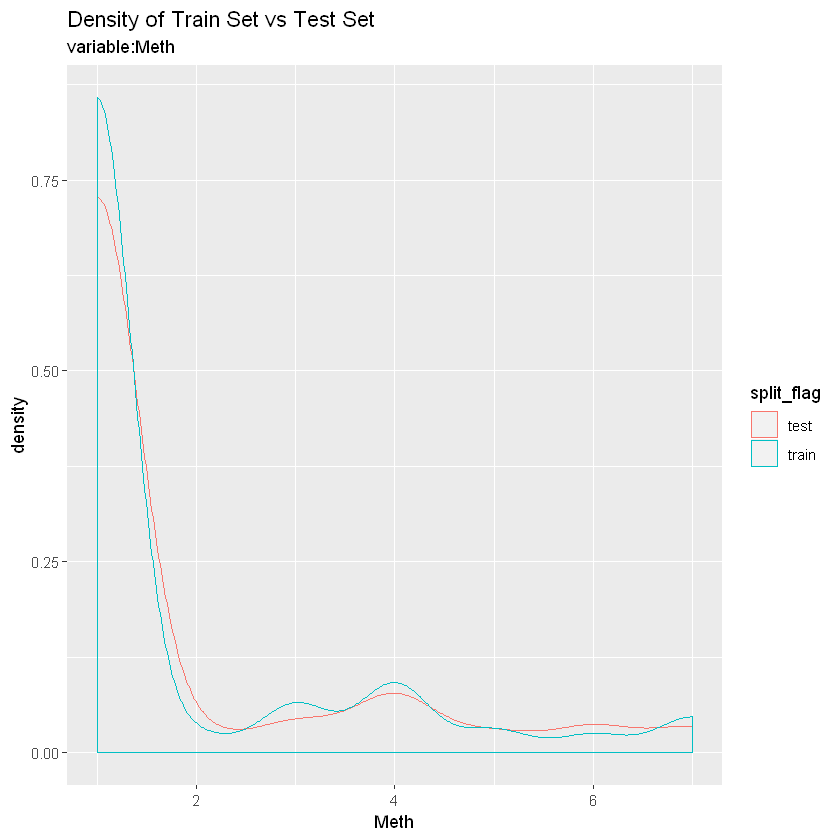

In [34]:
sb %>%
  compare_plot()